In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Day 9: Polynomial Interpolation

As a reminder, interpolation means fitting curves *through* existing data points. That is, our observed data points will fall exactly on the curve(s) we are constructing. It is always possible to construct a *unique* polynomial of degree at most $n-1$ that passes through $n$ distinct data points having distinct "$x$" coordinates.

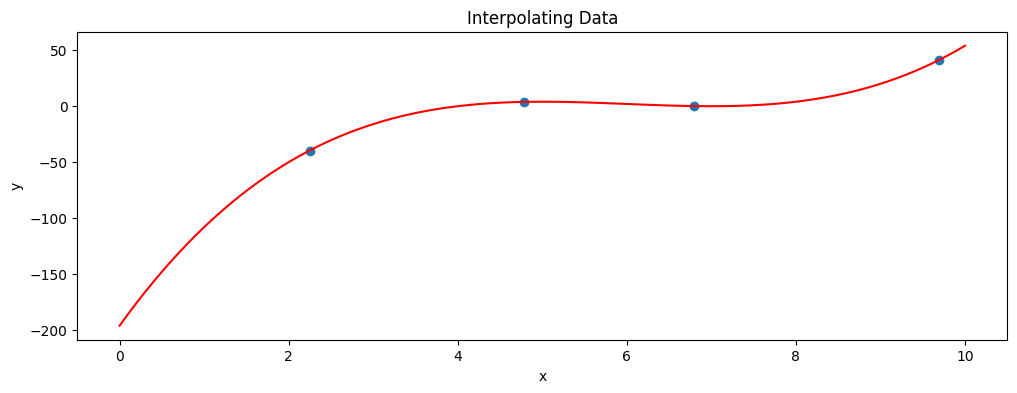

In [ ]:
#@title
x_vals = np.random.uniform(0, 10, 4)
y_vals = (x_vals-4)*(x_vals-7)**2

x_new = np.linspace(0, 10, 100)
y_interp = (x_new - 4)*(x_new - 7)**2

plt.figure(figsize = (12, 4))
plt.scatter(x_vals, y_vals)
plt.plot(x_new, y_interp, color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolating Data")
plt.show()

### An Example

As usual, we'll find it helpful to have an example to work with while we introduce and discuss the methods for polynomial interpolation below.

**Example:** Construct a degree-three polynomial interpolant for the observed data

<center>

x | y
--|--
1 | 4
5 | 12
7 | 8
15 | 20

</center>

> *Solution.*

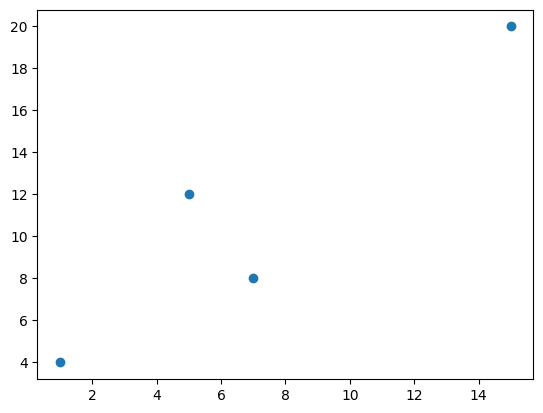

In [ ]:
xData = np.array([1.0, 5, 7, 15])
yData = np.array([4.0, 12, 8, 20])

plt.scatter(xData, yData)
plt.show()

## Largrange's Method

One means of obtaining the unique polynomial described above is using Lagrange's formula:

$$P_{n}\left(x\right) = \sum_{i = 0}^{n}{y_i\ell_{i}\left(x\right)}$$

where $n$ is the degree of the polynomial and

\begin{align*} \ell_{i}\left(x\right) &= \left(\frac{x - x_0}{x_i - x_0}\right)\left(\frac{x - x_1}{x_i - x_1}\right)\cdots \left(\frac{x - x_{i-1}}{x_i - x_{i-1}}\right)\left(\frac{x - x_{i+1}}{x_i - x_{i+1}}\right)\cdots \left(\frac{x - x_n}{x_i - x_n}\right)\\
&= \prod_{\substack{j=0\\ j\neq i}}^{n}{\frac{x - x_{j}}{x_i - x_j}}~~\text{for}~~i = 0, 1, \cdots, n
\end{align*}

The $\ell_{i}\left(x\right)$ functions are called the *cardinal functions*.

Note that if $n = 1$ (two points), we have a linear function:

$$P_1\left(x\right) = y_0\left(\frac{x - x_1}{x_0 - x_1}\right) + y_1\left(\frac{x - x_0}{x_1 - x_0}\right)$$

Note also that for any $\ell_{i}\left(x\right)$ and any observed data point $x_j$, we have $\ell_{i}\left(x_j\right) =\left\{\begin{array}{lcl} 0 &\text{if} & j\neq i\\ 1 &\text{if} & j = i\end{array}\right.$. We can see this by evaluating $P_1\left(x_0\right)$ and $P_{1}\left(x_1\right)$ above.

**Example:** Use the code block below to construct and plot the polynomial interpolation via Lagrange's Method for the four points at the beginning of this notebook.

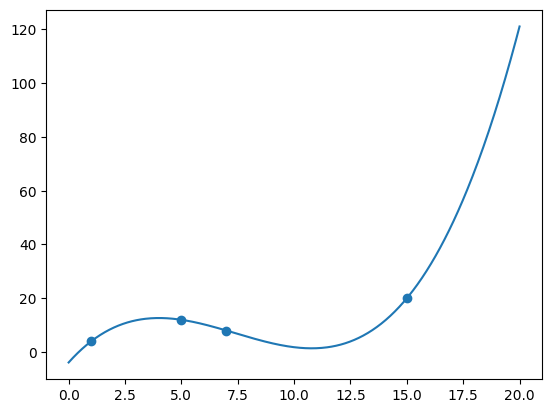

In [ ]:
def f(x):
  term1 = 4*((x - 5)*(x - 7)*(x-15))/((1 - 5)*(1 - 7)*(1 - 15))
  term2 = 12*((x - 1)*(x - 7)*(x-15))/((5 - 1)*(5 - 7)*(5 - 15))
  term3 = 8*((x - 1)*(x - 5)*(x-15))/((7 - 1)*(7 - 5)*(7 - 15))
  term4 = 20*((x - 1)*(x - 5)*(x - 7))/((15 - 1)*(15 - 5)*(15 - 7))

  return term1 + term2 + term3 + term4

x_vals = np.linspace(0, 20, 500)
y_vals = f(x_vals)

plt.scatter(xData, yData)
plt.plot(x_vals, y_vals)
plt.show()

### Approximation Error

The function we are attempting to approximate may not actually be a polynomial. In these cases, we'll have approximation error because the functional form is incorrect. It can be shown that the error in using a polynomial interpolant $P_n\left(x\right)$ as an approximation for the true function $f\left(x\right)$ is bounded by

$$f\left(x\right) - P_{n}\left(x\right) = \frac{\left(x - x_0\right)\left(x - x_1\right)\cdots \left(x - x_n\right)}{\left(n+1\right)!}f^{\left(n+1\right)}\left(\xi\right)$$

where $f^{\left(n+1\right)}$ is the $n^{th}$ derivative of the true function $f\left(x\right)$ and $\xi$ is somewhere in the interval $I = \left(x_0, x_n\right)$.

While Lagrange's method is relatively easy to understand, it is algorithmically inefficient. We'll explore Newton's Method as an alternative below.

## Newton's Method

Newton's method for polynomial interpolation is to construct a polynomial of the form

$$P_{n}\left(x\right) = a_0 + \left(x - x_0\right)a_1 + \left(x - x_0\right)\left(x - x_1\right)a_2 + \cdots + \left(x - x_0\right)\left(x - x_1\right)\cdots\left(x - x_{n-1}\right)a_n$$

For example, a degree three polynomial (an interpolant on four data points) is given by

\begin{align*} P_{3}\left(x\right) &= a_0 + \left(x - x_0\right)a_1 + \left(x - x_0\right)\left(x - x_1\right)a_2 + \left(x - x_0\right)\left(x - x_1\right)\left(x - x_2\right)a_3\\
&= a_0 + \left(x - x_0\right)\left(a_1 + \left(x - x_1\right)a_2 + \left(x - x_1\right)\left(x - x_2\right)a_3\right)\\
&= a_0 + \left(x - x_0\right)\left(a_1 + \left(x - x_1\right)\left(a_2 + \left(x - x_2\right)a_3\right)\right)
\end{align*}

which can be evaluated backwards using the following recurrence:

\begin{align*} P_0\left(x\right) &= a_3\\
P_1\left(x\right) &= a_2 + \left(x - x_2\right)P_0\left(x\right)\\
P_1\left(x\right) &= a_1 + \left(x - x_1\right)P_1\left(x\right)\\
P_2\left(x\right) &= a_0 + \left(x - x_0\right)P_2\left(x\right)
\end{align*}

This doesn't just work nicely for $n = 3$ -- we have the following recurrence for any $n$.

\begin{align*} P_0\left(x\right) &= a_n\\
p_k\left(x\right) & = a_{n - k} + \left(x - x_{n - k}\right)P_{k - 1}\left(x\right)~~\text{for}~~ k \in [n]
\end{align*}

Now that we have this evaluation strategy, we can write a routine to evaluate such a polynomial!

```
p = a[n]

for k in range(1, n + 1):
  p = a[n - k] + (x - xData[n - k])*p
```

The only unfortunate thing is that we don't yet know how to determine the coefficients $a_0,a_1,\cdots, a_n$. We can determine them, however, because we know that our polynomial must pass through each of our data points. That is, for each observed data point $\left(x_i, y_i\right)$, we must have $y_i = P_n\left(x_i\right)$, which results in a simultaneous system:

\begin{align*} y_0 &= a_0\\
y_1 &= a_0 + \left(x_1 - x_0\right)a_1\\
y_2 &= a_0 + \left(x_2 - x_0\right)a_1 + \left(x_2 - x_0\right)\left(x_2 - x_1\right)a_2\\
&\vdots\\
y_n &= a_0 + \left(x_n - x_0\right)a_1 + \left(x_n - x_0\right)\left(x_n - x_1\right)a_2 + \cdots + \left(x_n - x_0\right)\left(x_n - x_1\right)\cdots \left(x_n - x_{n-1}\right)a_{n}
\end{align*}

Note that this is not a *linear* system due to the products. However, we can solve the system if we introduce divided differences. That is,

\begin{align*} \nabla y_i &= \frac{y_i - y_0}{x_i - x_0}\\
\nabla^2y_i &= \frac{\nabla y_i - \nabla y_1}{x_i - x_1}\\
\nabla^3y_i &= \frac{\nabla^2y_i - \nabla^2y_2}{x_i - x_2}\\
&\vdots\\
\nabla^ny_i &= \frac{\nabla^{n-1}y_i - \nabla^{n-1}y_{n-1}}{x_i - x_{n-1}}
\end{align*}

The solution of the system is then

$$a_0 = y_0~~a_1 = \nabla y_1~~a_2 = \nabla^2 y_2~~\cdots~~a_n = \nabla^{n} y_n$$

If we wanted to compute the coefficients by hand, we could use a tableau like the one below.

$$\begin{array}{|c||c|c|c|c|c|}\hline
x_0 & y_0 & & & &\\ \hline
x_1 & y_1 & \nabla y_1 & & &\\ \hline
x_2 & y_2 & \nabla y_2 & \nabla^2 y_2 & & \\ \hline
x_3 & y_3 & \nabla y_3 & \nabla^2 y_3 & \nabla^3 y_3 & \\ \hline
x_4 & y_4 & \nabla y_4 & \nabla^2 y_4 & \nabla^3 y_4 & \nabla^4 y_4 \\ \hline
\end{array}$$

The diagonals are the coefficients of our polynomial. The table entries will change depending on the order that the data points appear in our set of observations, however, the resulting polynomial does not depend on the order of the data points.

We can compute the diagonal entries of the table numerically using a 1-D array as follows:

```
a = yData.copy()

for k in range(1, m):
  for i in range(k, m):
    a[i] = (a[i] - a[k-1])/(xData[i] - xData[k-1])
```

Initially, the array $a$ contains the column of $y$-values from the tableau. Each pass through the outer `for` loop creates the next column, leaving the diagonal entries of the tableau at the "front" of the array.



Finally, we are able to write the full algorithm for Newton's Method of Polynomial Interpolation.

In [ ]:
## Newton's Method for Polynomial Interpolation
def getCoefficients(xData, yData):
  m = len(xData)
  a = yData.copy()

  for k in range(1, m):
    a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])

  return a

def evaluatePolynomial(a, xData, x):
  deg = len(xData) - 1
  p = a[deg]

  for k in range(1, deg + 1):
    p = a[deg-k] + (x - xData[deg-k])*p

  return p

[ 1.78311398  0.47846175  0.3764824   0.20737162 -0.22887166 -2.861002
 -0.89716413 -0.35591165  0.51312021  0.32139318]


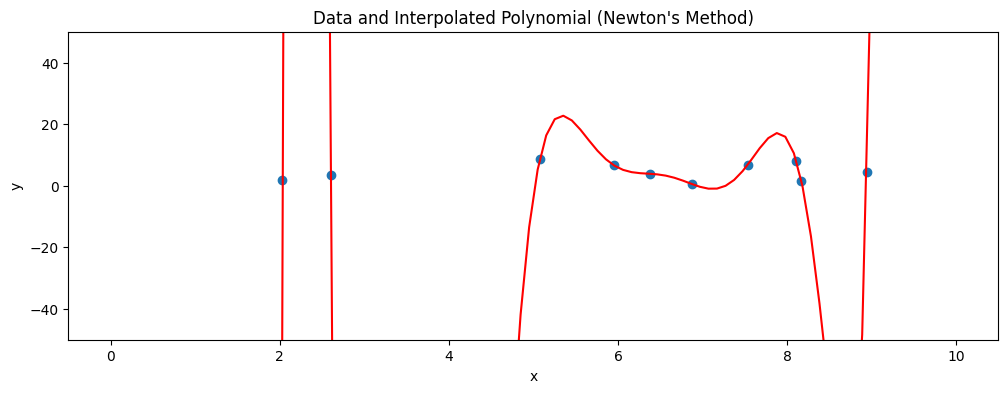

In [ ]:
xData = np.random.uniform(0, 10, 10)
yData = np.random.uniform(0, 10, 10)

coefs = getCoefficients(xData, yData)

print(coefs)

x_new = np.linspace(0, 10, 100)
y_new = evaluatePolynomial(coefs, xData, x_new)

plt.figure(figsize = (12, 4))
plt.scatter(xData, yData)
plt.plot(x_new, y_new, color = "red")
plt.ylim((-50, 50))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data and Interpolated Polynomial (Newton's Method)")
plt.show()

## Limitations to Polynomial Interpolation

Including additional observed data points automatically increases the degree of the interpolated polynomial. This can be really detrimental, especially if there is slight noise in the measured observations. For example, consider the *nearly-linear* data points below.

<center>

x | y
--|--
1 | 1
2 | 2.1
3 | 2.9
4 | 4
9 | 8.9

</center>

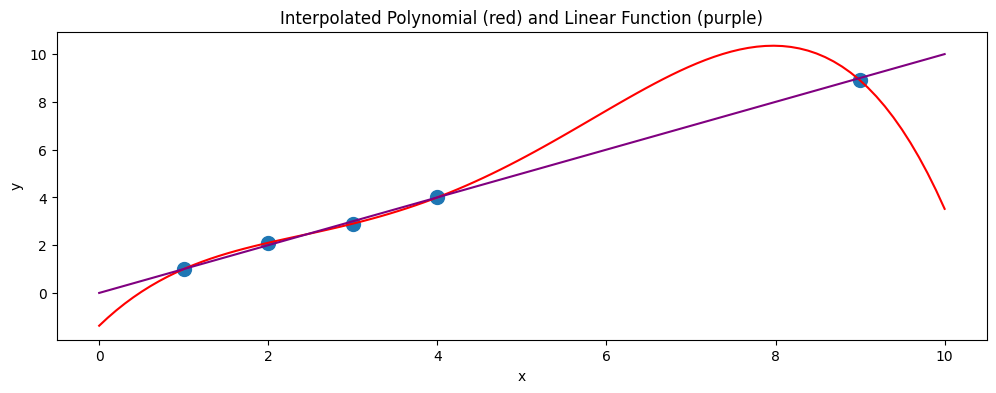

In [ ]:
#@title
xData = np.array([1.0, 2, 3, 4, 9])
yData = np.array([1.0, 2.1, 2.9, 4, 8.9])

coefs = getCoefficients(xData, yData)

x_new = np.linspace(0, 10, 100)
y_new = evaluatePolynomial(coefs, xData, x_new)

plt.figure(figsize = (12, 4))
plt.scatter(xData, yData, s = 100)
plt.plot(x_new, y_new, color = "red")
plt.plot([0, 10], [0,10], color = "purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated Polynomial (red) and Linear Function (purple)")
plt.show()

We can see that the interpolated polynomial has emphasized bends to accommodate the "measurement error". In fact, interpolated values for $x < 1$ and for $x > 4$ should probably not be trusted.

**General Rule 1:** Polynomial *extrapolation* (interpolating outside the range of observed values) should be avoided.

**General Rule 2:** Polynomial interpolation should be carried out with the fewest number of data points feasible. For example, if you suspect that your polynomial should be degree $2$, then use three data points. An interpolated polynomial passing through more than $6$ observed data points should be viewed with extreme suspicion -- In fact, the more data points used, the more suspicious we should be of our polynomial.

#### A Note on Extrapolation

Sometimes extrapolation cannot be avoided. In cases where you must extrapolate, use a low-order (small degree) polynomial interpolated only on the nearest-neighbor observations. Additionally, you should plot the interpolated polynomial for visual confirmation that the extrapolation makes sense. For example, in the plot of the interpolated polynomial on the nearly-linear data earlier, we can clearly see that using that red polynomial to extrapolate $p\left(10\right)$ is not a good idea.

***

## Summary

In this notebook we covered and implemented Newton's Method for polynomial interpolation. We completed an example of constructing an interpolated polynomial by hand (using both Lagrange's method and Newton's method) and we also used our own routine, coded in Python, to construct and evaluate an interpolated polynomial. We also highlighted some concerns to be aware of when interpolating with polynomials. In particular,

+ We should use the fewest number of observed data points required to interpolate our polynomial (a degree $n$ polynomial requires $n+1$ data points)
+ We should try to avoid extrapolation (evaluating an interpolated polynomial outside of the range of observed data)

In the next notebook we'll look at the method of interpolating with *cubic splines*.

**Note:** There are two additional topics covered in this section of our textbook that I didn't include here.

+ Neville's method is a faster method of polynomial interpolation appropriate for use if we only want to interpolate a single value rather than interpolating many values as we did when constructing and plotting our polynomial interpolants here.
+ Interpolation by rational functions is sometimes more appropriate than using polynomial interpolants. This is especially the case when there is theoretical justification for the existence of asymptotes in the relationship between the independent and dependent variables.